In [2]:
import e1
import numpy as np
import matplotlib.pyplot as plt

In [3]:
signal=e1.signalToDf(e1.getFileName(10000,16,1,100,0.001))

In [4]:
def createTemplateBank(file, fn, fmin, fmax, phin, phimin=0, phimax=2*np.pi):
    f = np.linspace(fmin, fmax, fn)
    phi = np.linspace(phimin, phimax, phin)
    stack=np.dstack(np.meshgrid(f,phi))
    return np.savetxt("../code/templates/"+file, stack.reshape((fn*phin,2)), delimiter=" ")

In [5]:
createTemplateBank('tb',1000,1,1000,10)
createTemplateBank('tbBIG',2000,90,110,20)
createTemplateBank('tbbig',1000,90,110,20)
createTemplateBank('tbsmall',800,90,110,15)
createTemplateBank('tbsmaller',100,90,110,10)
createTemplateBank('tbtiny',100,90,110,6)
createTemplateBank('tblow',100,1,10,10)

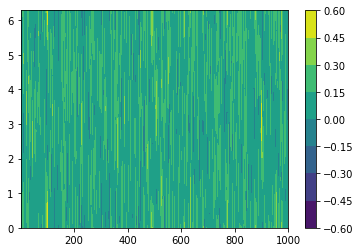

In [5]:
# test .tb file
e1.prober_tb(e1.getFileName(10000,16,1,100,0.001),1,"tb")
df=e1.proberToDf(e1.getFileName(10000,16,1,100,0.001),True)
plt.contourf(df[0].drop_duplicates(),df[1].drop_duplicates(),df[2].values.reshape(10,1000))
plt.colorbar()
plt.show()

TypeError: Length of x (800) must match number of columns in z (1200)

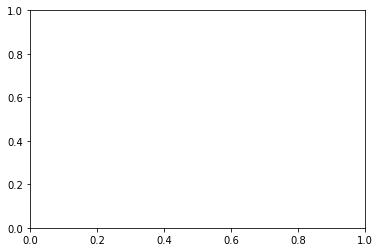

In [34]:
e1.prober_tb(e1.getFileName(10000,16,1,100,0.001),1,"tbsmall")
df=e1.proberToDf(e1.getFileName(10000,16,1,100,0.001),True)
plt.contourf(df[0].drop_duplicates(),df[1].drop_duplicates(),df[2].values.reshape(10,1200))
plt.colorbar()
plt.show()

In [7]:
# read task
# TODO mismatch
df[1]

0        0.00000
1        0.00000
2        0.00000
3        0.00000
4        0.00000
          ...   
11995    6.28319
11996    6.28319
11997    6.28319
11998    6.28319
11999    6.28319
Name: 1, Length: 12000, dtype: float64

In [9]:
def mismatch(signalFile,tb,trueFreq, truePhi,method):
    # calc 'true' values
    sbar = str(e1.prober(signalFile, method, trueFreq, truePhi).output,'utf-8').split()
    # prober the signal with the template bank
    e1.prober_tb(signalFile, method, tb)
    # read the prober output to a dataframe
    df = e1.proberToDf(signalFile,True)
    # calculate the mismatch
    return 1-df[2]/float(sbar[2])

In [9]:
def plotmismatch(signalFile,tb,trueFreq, truePhi,method):
    # calc 'true' values
    sbar = str(e1.prober(signalFile, method, trueFreq, truePhi).output,'utf-8').split()
    print(sbar)
    # prober the signal with the template bank
    e1.prober_tb(signalFile, method, tb)
    # read the prober output to a dataframe
    df = e1.proberToDf(signalFile,True)
    # template dimensions
    (a ,b)  = (df[0].drop_duplicates(),df[1].drop_duplicates())
    # plot the prober output
    plt.contourf(a,b,df[2].values.reshape(len(b.index),len(a.index)))
    plt.colorbar()
    plt.show()
    # calculate the mismatch
    mismatch = 1-df[2]/float(sbar[2])
    plt.plot(mismatch)
    plt.show()
    print([mismatch.min(),df.iloc[mismatch.argmin()]])

['100', '0', '0.509246']


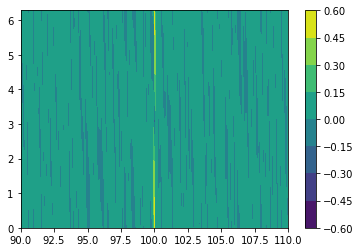

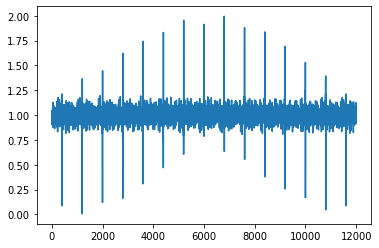

[0.004418296854565296, 0    99.987500
1     0.448799
2     0.506996
Name: 1199, dtype: float64]


In [10]:
plotmismatch(e1.getFileName(10000,4,1,100,0.001),"tbsmall",100,0,1)

In [7]:
# see how tb does for different frequencies
freqList = np.linspace(90.5,110,100)
for f in freqList:
    e1.generate_source(10000,4,1.4,f,0.001,4)

['90.5', '4', '0.689205']


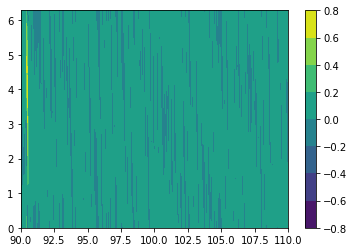

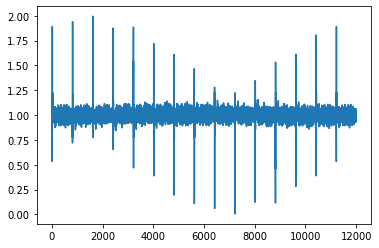

[0.00432817521637241, 0    90.500600
1     4.039190
2     0.686222
Name: 7220, dtype: float64]
['90.697', '4', '0.71939']


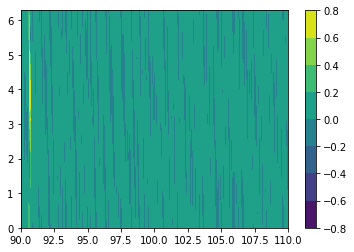

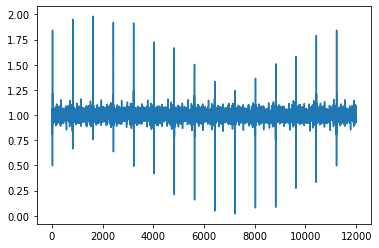

[0.0176774767511364, 0    90.700900
1     4.039190
2     0.706673
Name: 7228, dtype: float64]
['90.8939', '4', '0.736017']


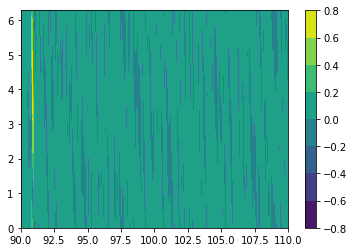

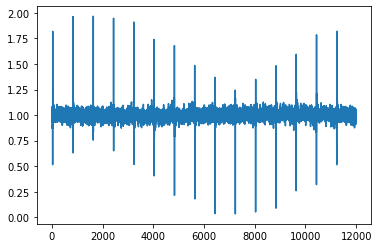

[0.03303592172463421, 0    90.901100
1     4.039190
2     0.711702
Name: 7236, dtype: float64]
['91.0909', '4', '0.751054']


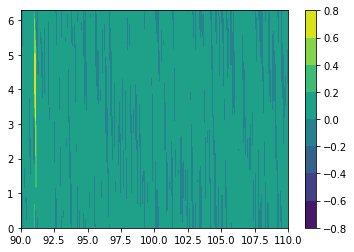

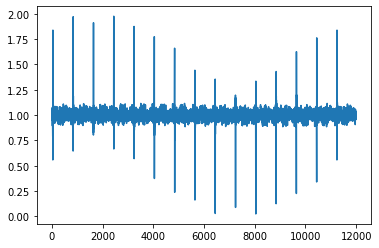

[0.025263163500893526, 0    91.07630
1     4.48799
2     0.73208
Name: 8043, dtype: float64]
['91.2879', '4', '0.688877']


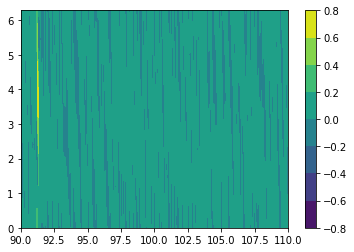

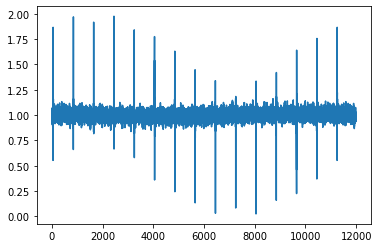

[0.02481284757656288, 0    91.276600
1     4.487990
2     0.671784
Name: 8051, dtype: float64]
['91.4848', '4', '0.665014']


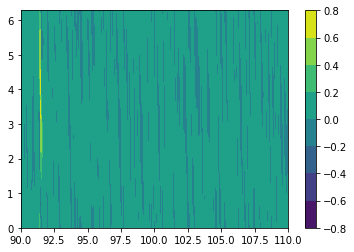

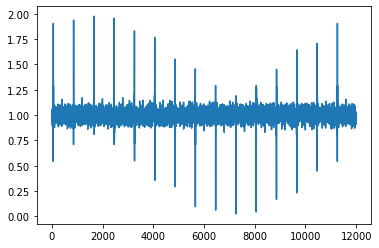

[0.024791959267023045, 0    91.476800
1     4.039190
2     0.648527
Name: 7259, dtype: float64]
['91.6818', '4', '0.716058']


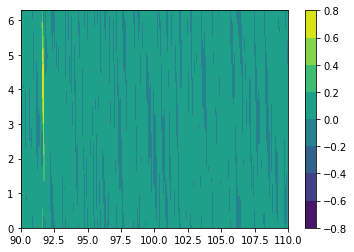

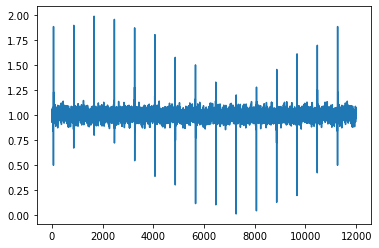

[0.0109865401964645, 0    91.677100
1     4.039190
2     0.708191
Name: 7267, dtype: float64]
['91.8788', '4', '0.711844']


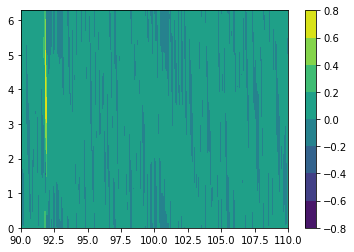

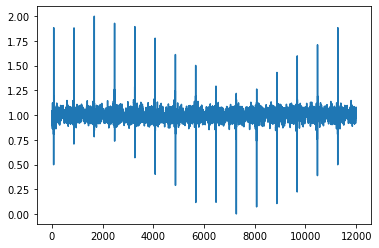

[8.00737240183036e-05, 0    91.877300
1     4.039190
2     0.711787
Name: 7275, dtype: float64]
['92.0758', '4', '0.685016']


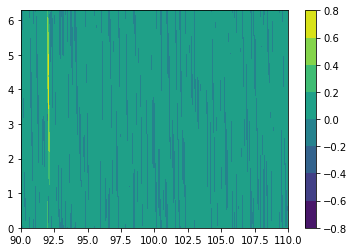

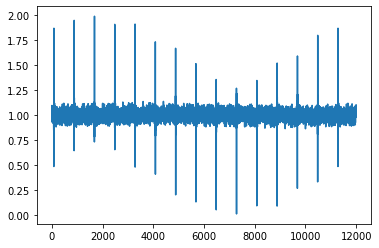

[0.009951592371564955, 0    92.077600
1     4.039190
2     0.678199
Name: 7283, dtype: float64]
['92.2727', '4', '0.633298']


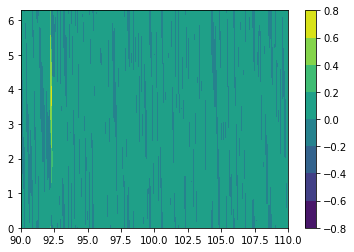

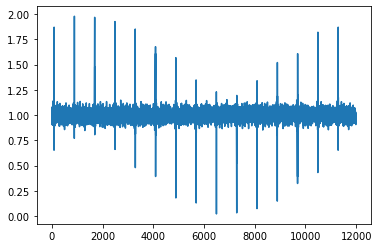

[0.019960587274869046, 0    92.277800
1     3.590390
2     0.620657
Name: 6491, dtype: float64]
['92.4697', '4', '0.718815']


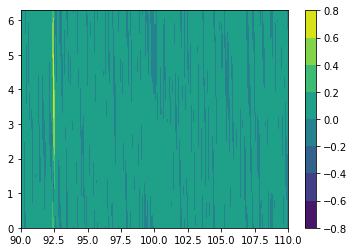

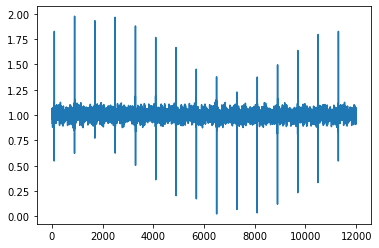

[0.02324520217302084, 0    92.478100
1     3.590390
2     0.702106
Name: 6499, dtype: float64]
['92.6667', '4', '0.726679']


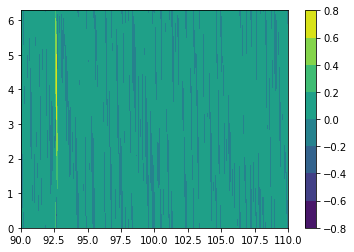

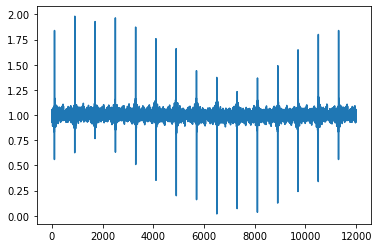

[0.01778364312165348, 0    92.678300
1     3.590390
2     0.713756
Name: 6507, dtype: float64]
['92.8636', '4', '0.624585']


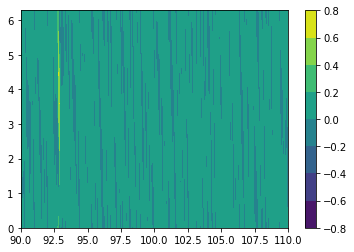

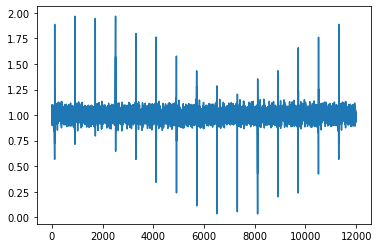

[0.03339817638912235, 0    92.853600
1     4.487990
2     0.603725
Name: 8114, dtype: float64]
['93.0606', '4', '0.730037']


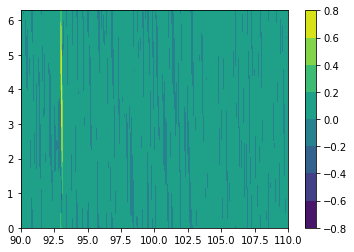

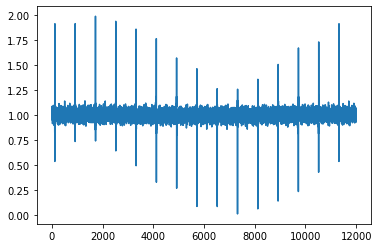

[0.008114657202306197, 0    93.053800
1     4.039190
2     0.724113
Name: 7322, dtype: float64]
['93.2576', '4', '0.718273']


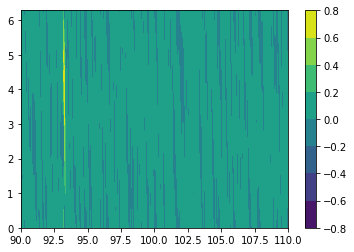

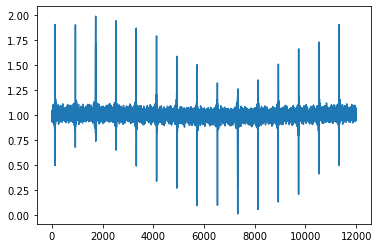

[0.00855524292295562, 0    93.254100
1     4.039190
2     0.712128
Name: 7330, dtype: float64]
['93.4545', '4', '0.723192']


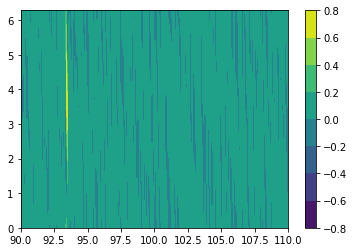

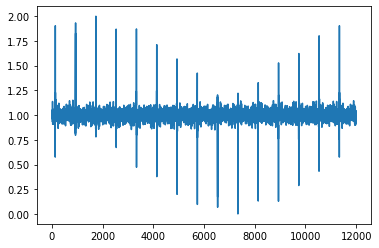

[0.001875020741379796, 0    93.454300
1     4.039190
2     0.721836
Name: 7338, dtype: float64]
['93.6515', '4', '0.705673']


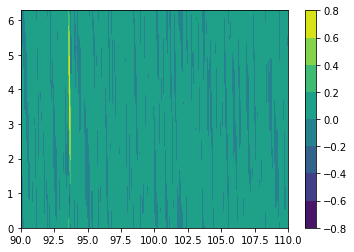

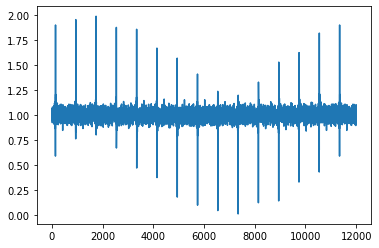

[0.008639979140480092, 0    93.654600
1     4.039190
2     0.699576
Name: 7346, dtype: float64]
['93.8485', '4', '0.706661']


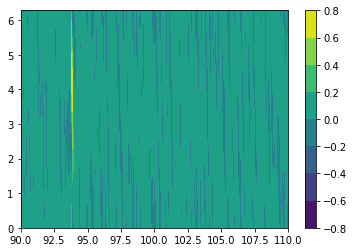

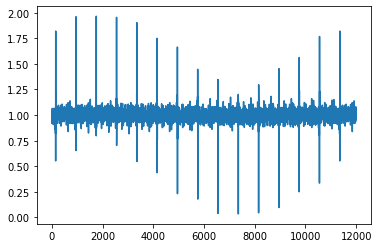

[0.0341620663939286, 0    93.85480
1     4.03919
2     0.68252
Name: 7354, dtype: float64]
['94.0455', '4', '0.722367']


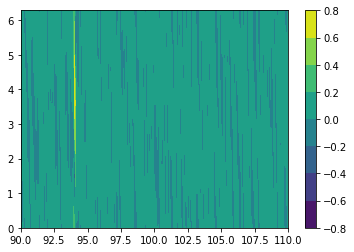

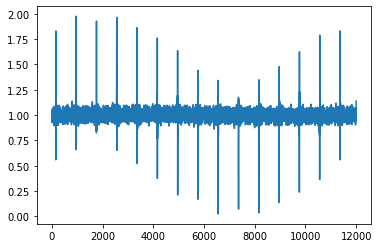

[0.02298693046609268, 0    94.055100
1     3.590390
2     0.705762
Name: 6562, dtype: float64]
['94.2424', '4', '0.700724']


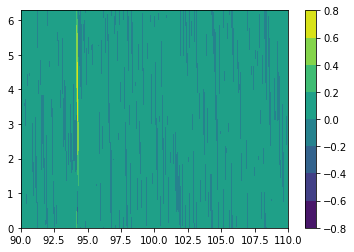

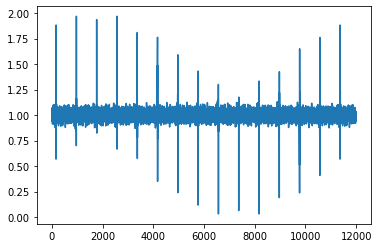

[0.031156346864100515, 0    94.230300
1     4.487990
2     0.678892
Name: 8169, dtype: float64]
['94.4394', '4', '0.639569']


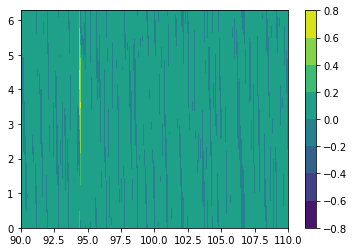

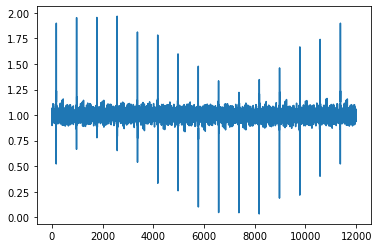

[0.032514083703243934, 0    94.430500
1     4.487990
2     0.618774
Name: 8177, dtype: float64]
['94.6364', '4', '0.713816']


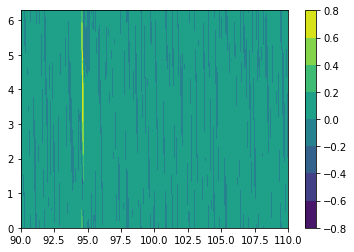

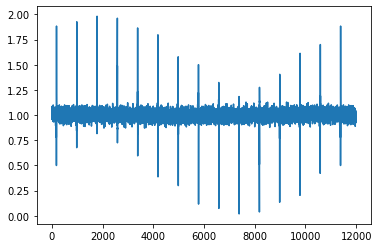

[0.01764180124850101, 0    94.630800
1     4.039190
2     0.701223
Name: 7385, dtype: float64]
['94.8333', '4', '0.653565']


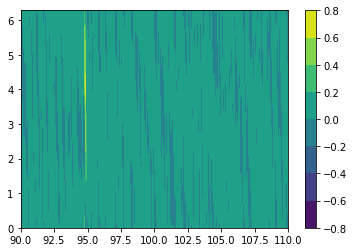

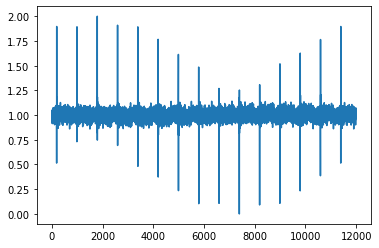

[-0.0005079831386318734, 0    94.831000
1     4.039190
2     0.653897
Name: 7393, dtype: float64]
['95.0303', '4', '0.716442']


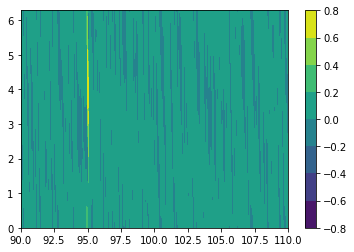

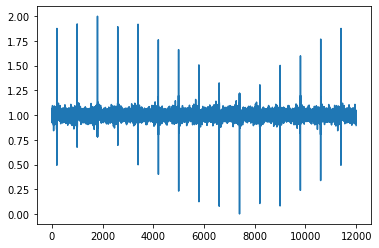

[0.0019275810184217201, 0    95.031300
1     4.039190
2     0.715061
Name: 7401, dtype: float64]
['95.2273', '4', '0.704748']


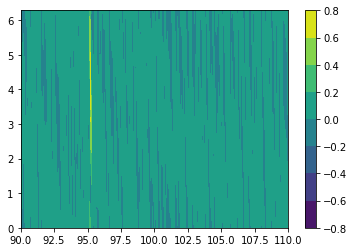

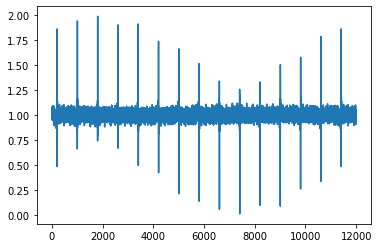

[0.008393070998427787, 0    95.231500
1     4.039190
2     0.698833
Name: 7409, dtype: float64]
['95.4242', '4', '0.722375']


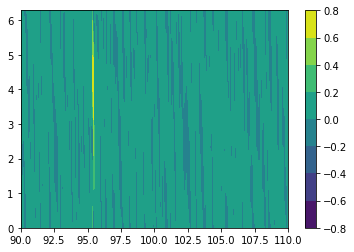

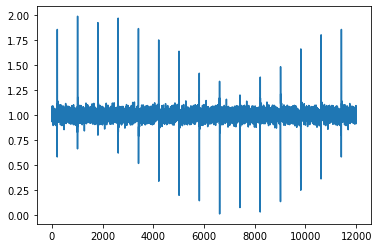

[0.014424640941339328, 0    95.431800
1     3.590390
2     0.711955
Name: 6617, dtype: float64]
['95.6212', '4', '0.745334']


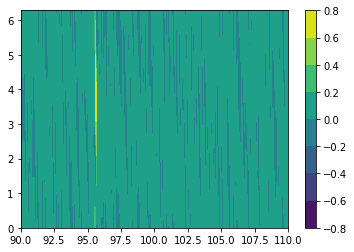

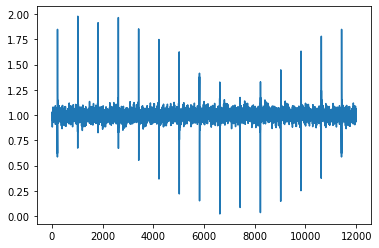

[0.022187368347613368, 0    95.632000
1     3.590390
2     0.728797
Name: 6625, dtype: float64]
['95.8182', '4', '0.699842']


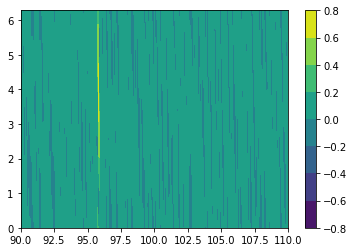

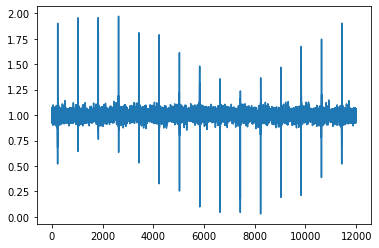

[0.029066560737995073, 0    95.80730
1     4.48799
2     0.67950
Name: 8232, dtype: float64]
['96.0152', '4', '0.715605']


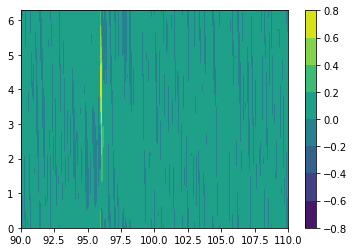

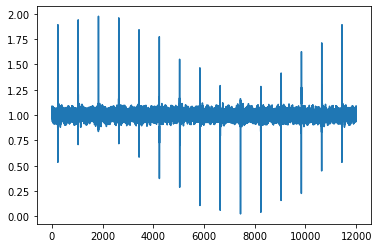

[0.0249243646984022, 0    96.007500
1     4.039190
2     0.697769
Name: 7440, dtype: float64]
['96.2121', '4', '0.670824']


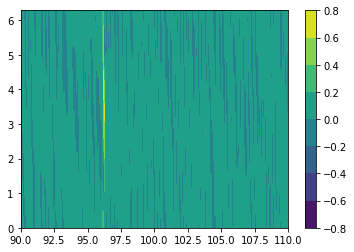

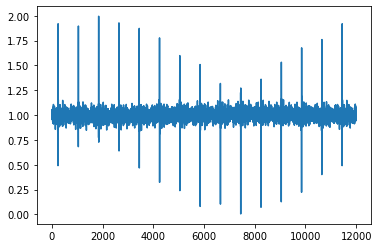

[0.004844787902639092, 0    96.207800
1     4.039190
2     0.667574
Name: 7448, dtype: float64]
['96.4091', '4', '0.661442']


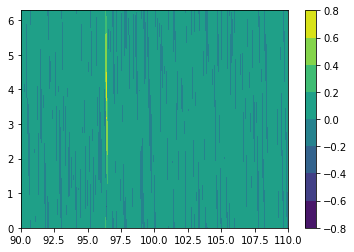

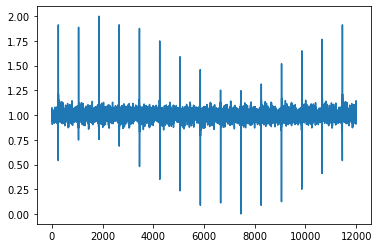

[0.0006092748872915665, 0    96.408000
1     4.039190
2     0.661039
Name: 7456, dtype: float64]
['96.6061', '4', '0.729767']


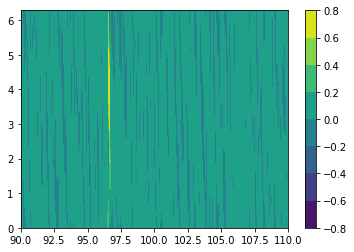

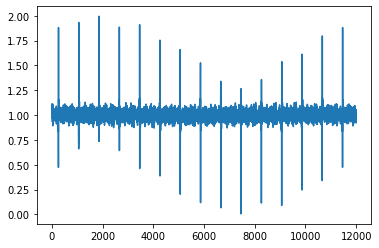

[0.004353444318529243, 0    96.60830
1     4.03919
2     0.72659
Name: 7464, dtype: float64]
['96.803', '4', '0.727528']


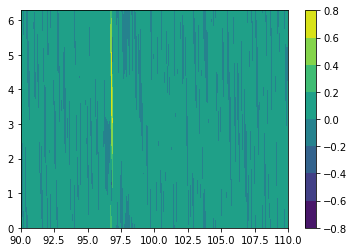

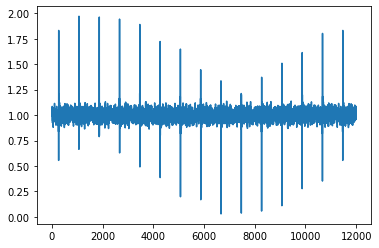

[0.02808964053617169, 0    96.808500
1     3.590390
2     0.707092
Name: 6672, dtype: float64]
['97', '4', '0.717824']


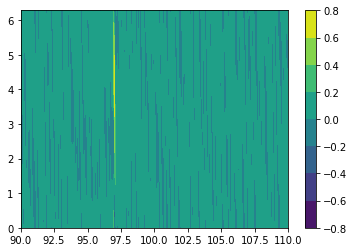

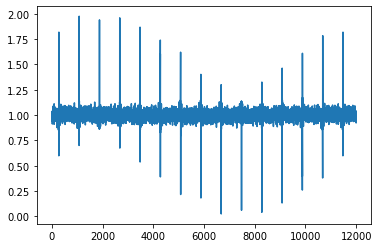

[0.024324904154778948, 0    97.008800
1     3.590390
2     0.700363
Name: 6680, dtype: float64]
['97.197', '4', '0.723262']


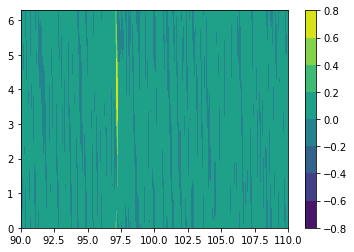

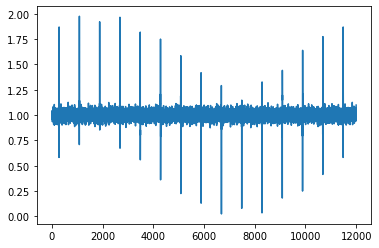

[0.024089472418017177, 0    97.209000
1     3.590390
2     0.705839
Name: 6688, dtype: float64]
['97.3939', '4', '0.742328']


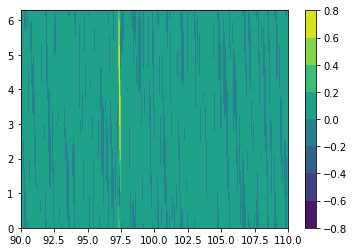

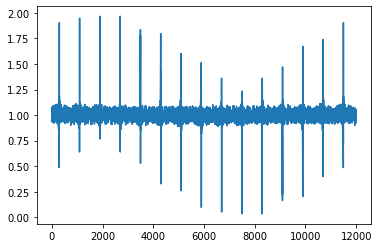

[0.03254356564753047, 0    97.38420
1     4.48799
2     0.71817
Name: 8295, dtype: float64]
['97.5909', '4', '0.748997']


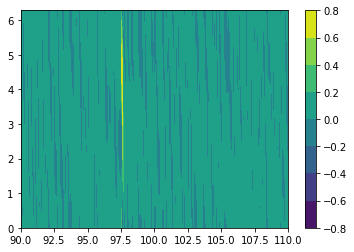

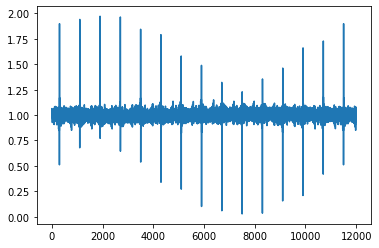

[0.027443367596933, 0    97.584500
1     4.039190
2     0.728442
Name: 7503, dtype: float64]
['97.7879', '4', '0.71722']


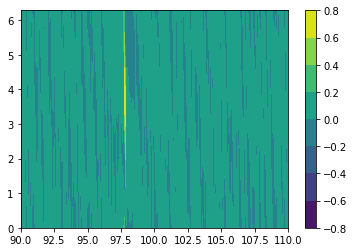

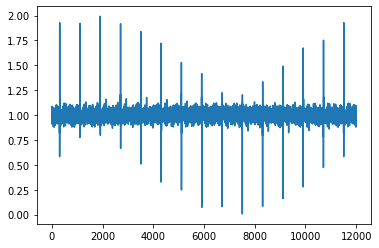

[0.0067245754440757866, 0    97.784700
1     4.039190
2     0.712397
Name: 7511, dtype: float64]
['97.9848', '4', '0.711342']


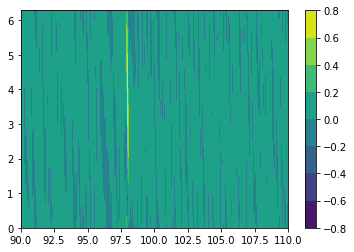

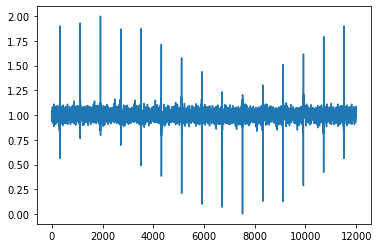

[0.0020440238310124315, 0    97.985000
1     4.039190
2     0.709888
Name: 7519, dtype: float64]
['98.1818', '4', '0.738146']


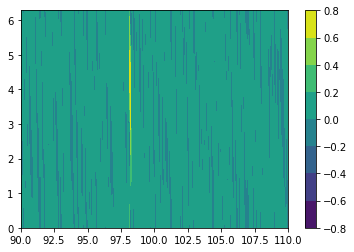

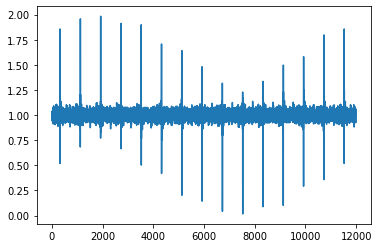

[0.016548216748448086, 0    98.185200
1     4.039190
2     0.725931
Name: 7527, dtype: float64]
['98.3788', '4', '0.743901']


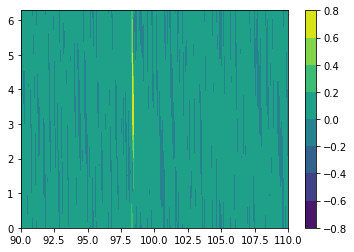

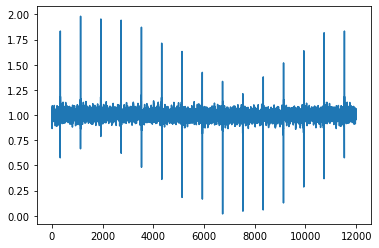

[0.018689314841625393, 0    98.385500
1     3.590390
2     0.729998
Name: 6735, dtype: float64]
['98.5758', '4', '0.756018']


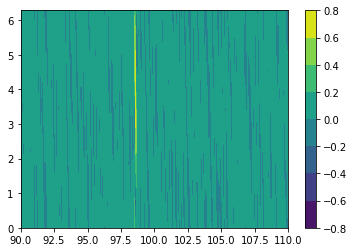

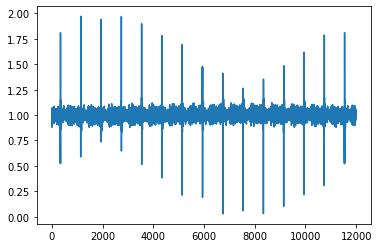

[0.027753307460933407, 0    98.585700
1     3.590390
2     0.735036
Name: 6743, dtype: float64]
['98.7727', '4', '0.704854']


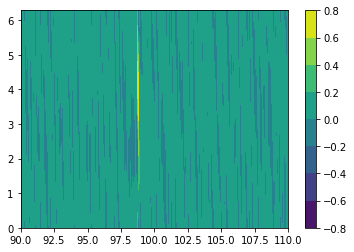

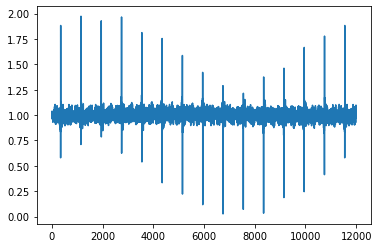

[0.026496267312095867, 0    98.786000
1     3.590390
2     0.686178
Name: 6751, dtype: float64]
['98.9697', '4', '0.72895']


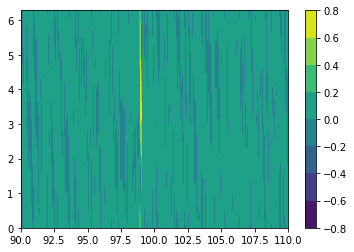

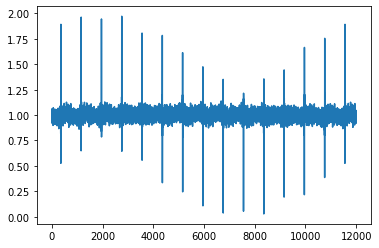

[0.027617806433911873, 0    98.961200
1     4.487990
2     0.708818
Name: 8358, dtype: float64]
['99.1667', '4', '0.675455']


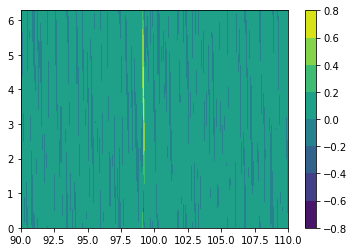

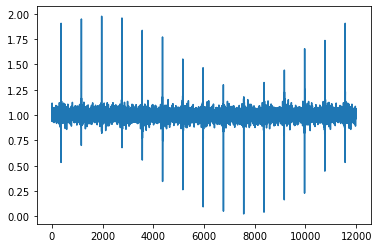

[0.023662568194772526, 0    99.161500
1     4.039190
2     0.659472
Name: 7566, dtype: float64]
['99.3636', '4', '0.738745']


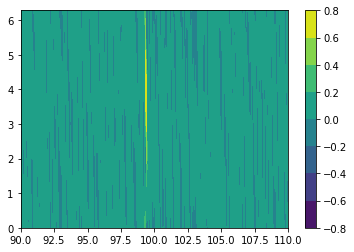

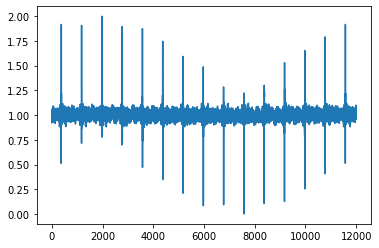

[0.0005590562372672636, 0    99.361700
1     4.039190
2     0.738332
Name: 7574, dtype: float64]
['99.5606', '4', '0.675485']


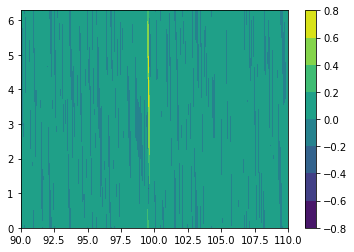

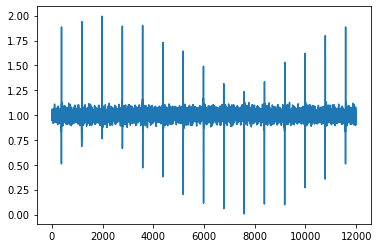

[0.0059986528198258116, 0    99.562000
1     4.039190
2     0.671433
Name: 7582, dtype: float64]
['99.7576', '4', '0.659983']


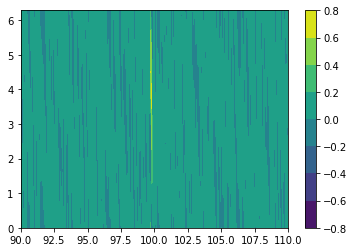

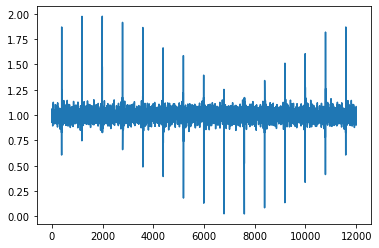

[0.02442941712135005, 0    99.76220
1     4.03919
2     0.64386
Name: 7590, dtype: float64]
['99.9545', '4', '0.680894']


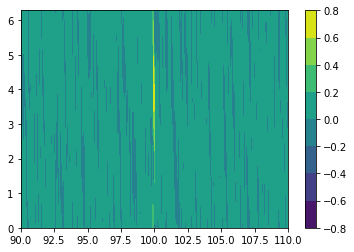

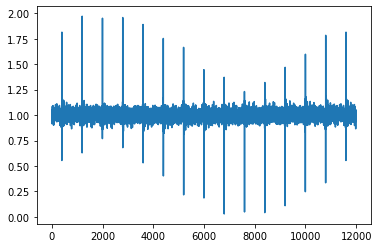

[0.02894429970010004, 0    99.962500
1     3.590390
2     0.661186
Name: 6798, dtype: float64]
['100.152', '4', '0.668778']


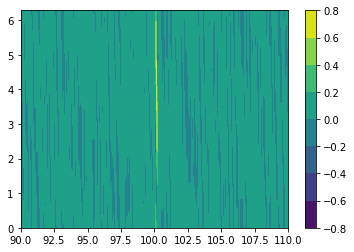

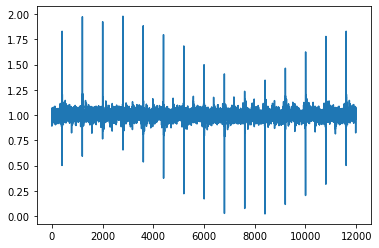

[0.022850632048303066, 0    100.138000
1      4.487990
2      0.653496
Name: 8405, dtype: float64]
['100.348', '4', '0.724871']


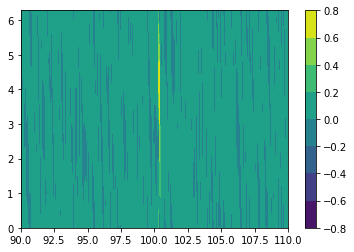

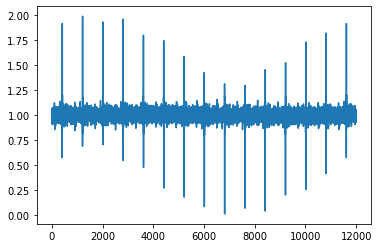

[0.015357215283822945, 0    100.363000
1      3.590390
2      0.713739
Name: 6814, dtype: float64]
['100.545', '4', '0.683659']


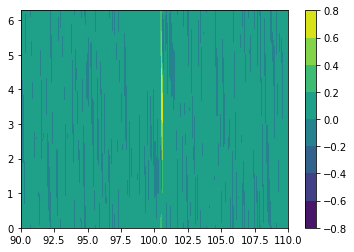

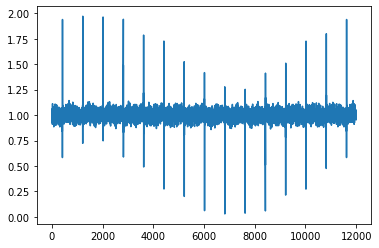

[0.02882577425295363, 0    100.563000
1      3.590390
2      0.663952
Name: 6822, dtype: float64]
['100.742', '4', '0.722793']


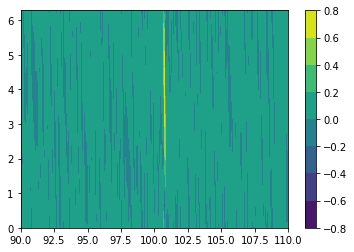

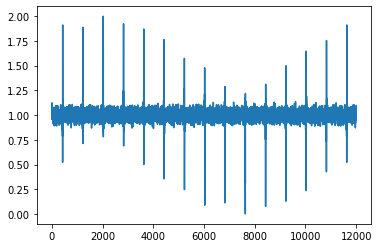

[0.0023229333986355405, 0    100.738000
1      4.039190
2      0.721114
Name: 7629, dtype: float64]
['100.939', '4', '0.661757']


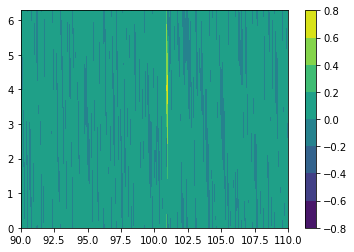

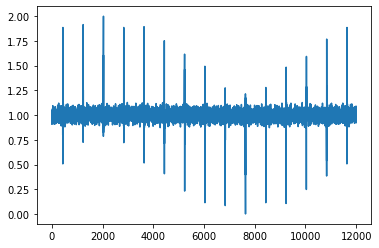

[0.00012844594012606514, 0    100.939000
1      4.039190
2      0.661672
Name: 7637, dtype: float64]
['101.136', '4', '0.695143']


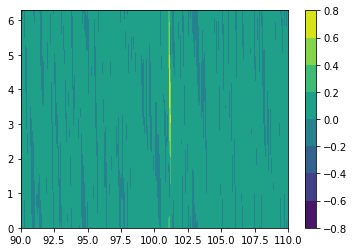

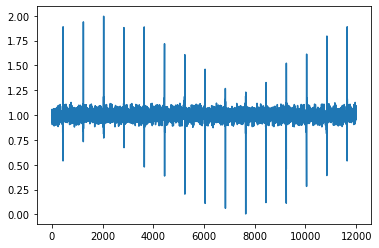

[0.00427106365165153, 0    101.139000
1      4.039190
2      0.692174
Name: 7645, dtype: float64]
['101.333', '4', '0.670398']


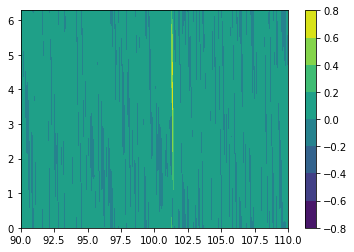

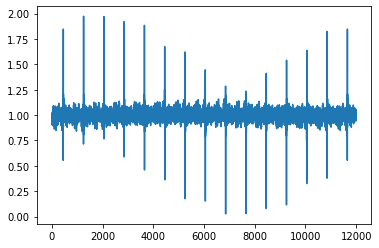

[0.026758731380463585, 0    101.339000
1      3.590390
2      0.652459
Name: 6853, dtype: float64]
['101.53', '4', '0.735108']


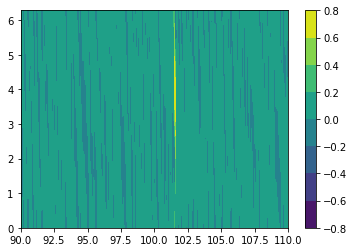

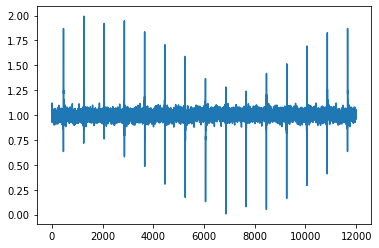

[0.00734177835093619, 0    101.539000
1      3.590390
2      0.729711
Name: 6861, dtype: float64]
['101.727', '4', '0.67892']


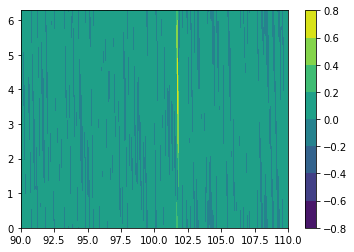

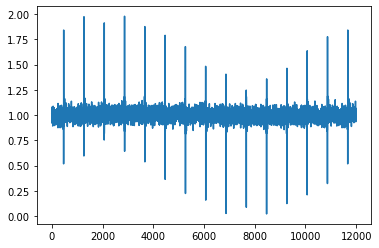

[0.021849407883108518, 0    101.715000
1      4.487990
2      0.664086
Name: 8468, dtype: float64]
['101.924', '4', '0.679683']


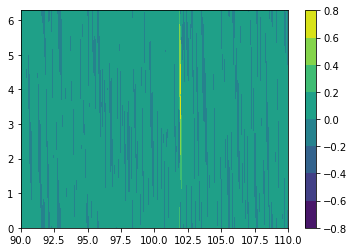

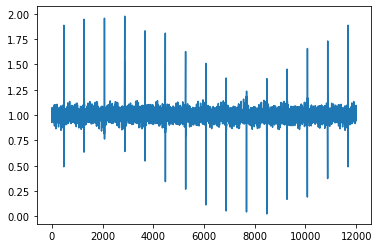

[0.02319905014543544, 0    101.915000
1      4.487990
2      0.663915
Name: 8476, dtype: float64]
['102.121', '4', '0.648723']


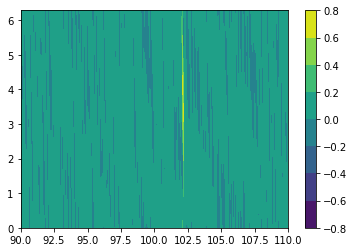

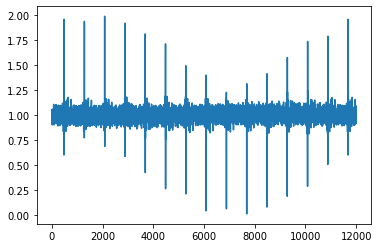

[0.013483412797141603, 0    102.115000
1      4.039190
2      0.639976
Name: 7684, dtype: float64]
['102.318', '4', '0.714935']


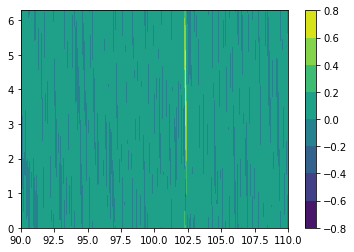

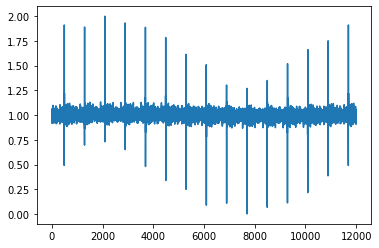

[0.0032324616923216087, 0    102.315000
1      4.039190
2      0.712624
Name: 7692, dtype: float64]
['102.515', '4', '0.734332']


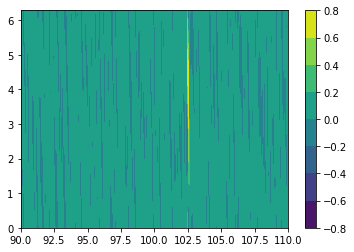

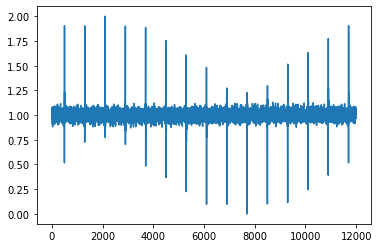

[-0.0015864758719488226, 0    102.516000
1      4.039190
2      0.735497
Name: 7700, dtype: float64]
['102.712', '4', '0.698705']


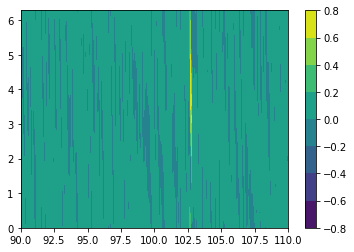

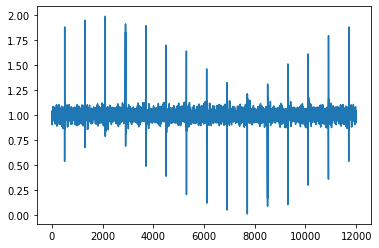

[0.01072126290780806, 0    102.716000
1      4.039190
2      0.691214
Name: 7708, dtype: float64]
['102.909', '4', '0.710538']


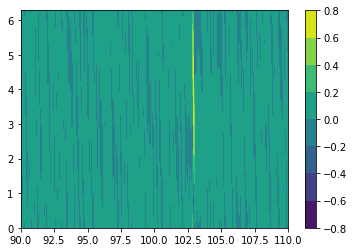

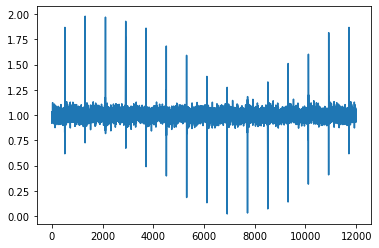

[0.02154705307809024, 0    102.916000
1      3.590390
2      0.695228
Name: 6916, dtype: float64]
['103.106', '4', '0.674369']


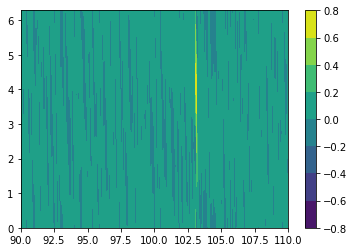

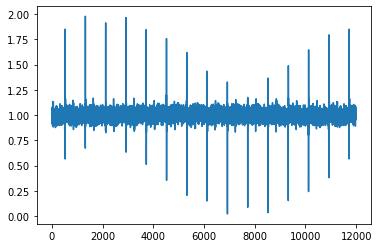

[0.0204190880660291, 0    103.116000
1      3.590390
2      0.660599
Name: 6924, dtype: float64]
['103.303', '4', '0.677907']


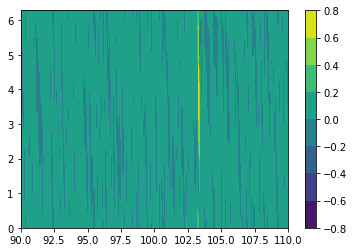

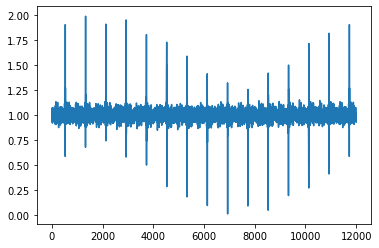

[0.009670943064461701, 0    103.317000
1      3.590390
2      0.671351
Name: 6932, dtype: float64]
['103.5', '4', '0.655004']


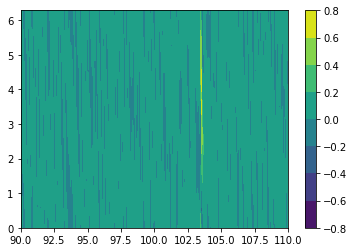

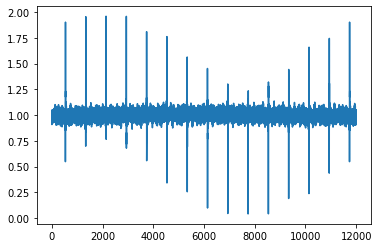

[0.03914021899102904, 0    103.492000
1      4.039190
2      0.629367
Name: 7739, dtype: float64]
['103.697', '4', '0.68177']


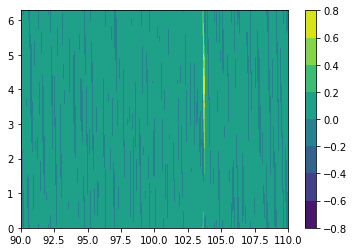

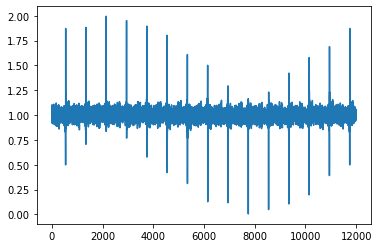

[0.004312304736201256, 0    103.69200
1      4.03919
2      0.67883
Name: 7747, dtype: float64]
['103.894', '4', '0.663197']


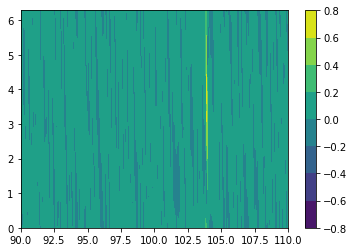

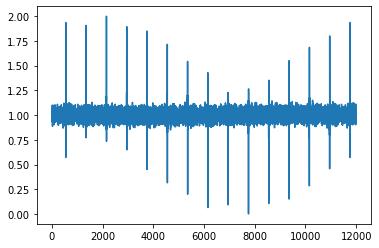

[0.002135112191400279, 0    103.892000
1      4.039190
2      0.661781
Name: 7755, dtype: float64]
['104.091', '4', '0.7397']


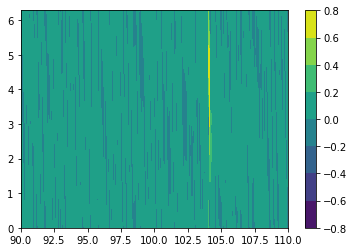

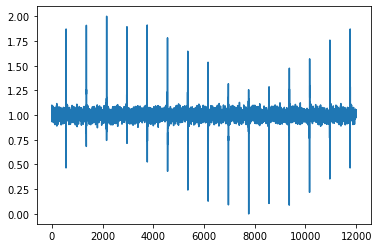

[-0.001921049073948966, 0    104.093000
1      4.039190
2      0.741121
Name: 7763, dtype: float64]
['104.288', '4', '0.700788']


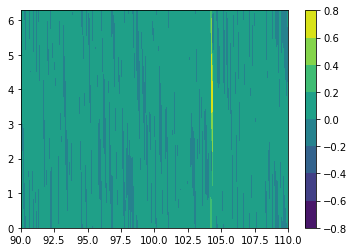

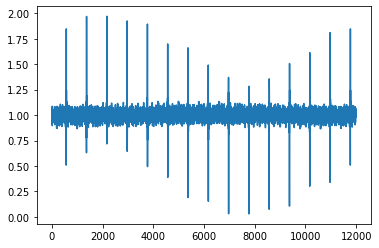

[0.028252481492263004, 0    104.293000
1      4.039190
2      0.680989
Name: 7771, dtype: float64]
['104.485', '4', '0.68231']


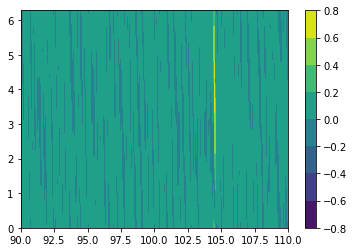

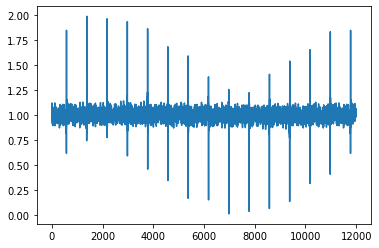

[0.015048878075947791, 0    104.493000
1      3.590390
2      0.672042
Name: 6979, dtype: float64]
['104.682', '4', '0.738414']


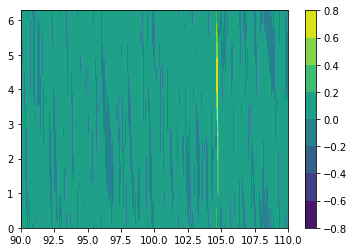

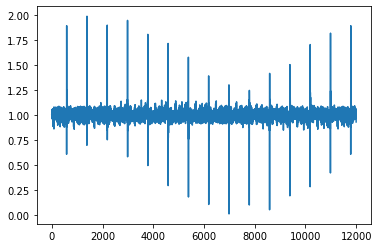

[0.008124168826701528, 0    104.693000
1      3.590390
2      0.732415
Name: 6987, dtype: float64]
['104.879', '4', '0.739311']


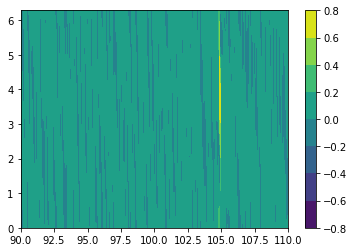

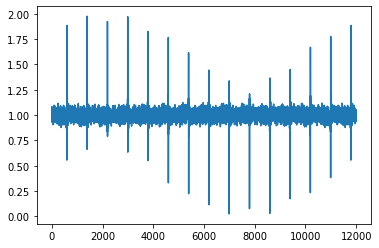

[0.025004362169641747, 0    104.894000
1      3.590390
2      0.720825
Name: 6995, dtype: float64]
['105.076', '4', '0.753826']


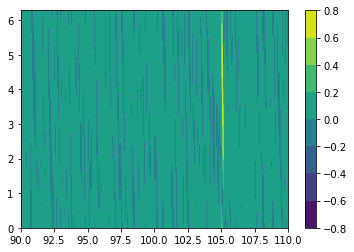

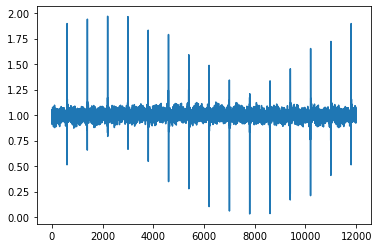

[0.030576021522208063, 0    105.069000
1      4.039190
2      0.730777
Name: 7802, dtype: float64]
['105.273', '4', '0.752785']


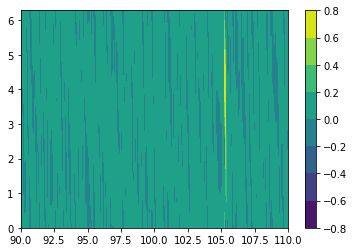

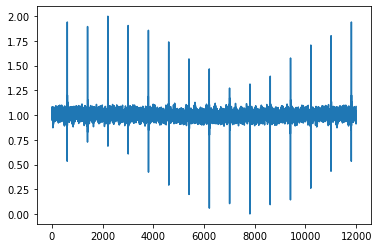

[0.0025000498150202777, 0    105.269000
1      4.039190
2      0.750903
Name: 7810, dtype: float64]
['105.47', '4', '0.673213']


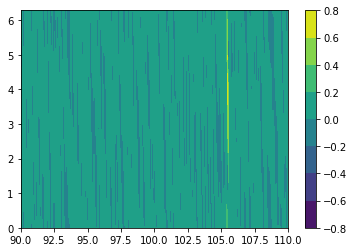

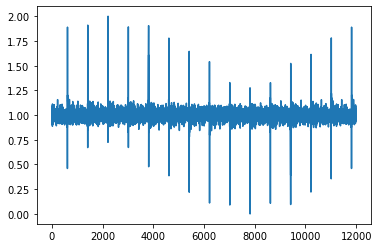

[3.119369352633239e-05, 0    105.469000
1      4.039190
2      0.673192
Name: 7818, dtype: float64]
['105.667', '4', '0.661245']


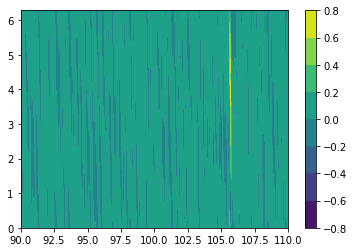

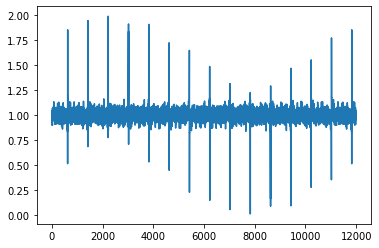

[0.011404245022646697, 0    105.670000
1      4.039190
2      0.653704
Name: 7826, dtype: float64]
['105.864', '4', '0.730202']


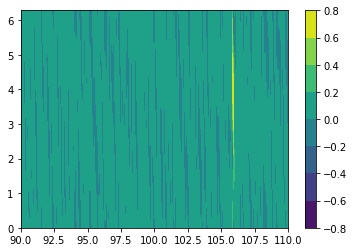

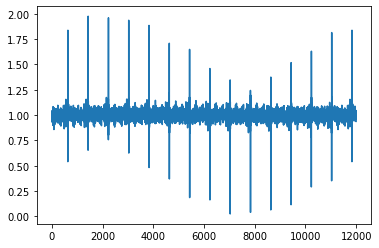

[0.02348254318667986, 0    105.870000
1      3.590390
2      0.713055
Name: 7034, dtype: float64]
['106.061', '4', '0.685977']


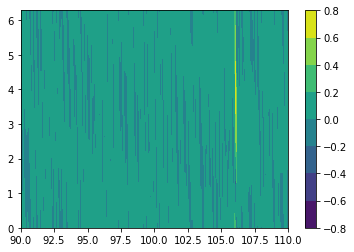

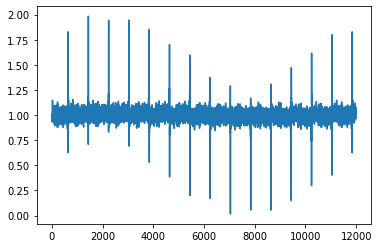

[0.016146313943470325, 0    106.070000
1      3.590390
2      0.674901
Name: 7042, dtype: float64]
['106.258', '4', '0.679118']


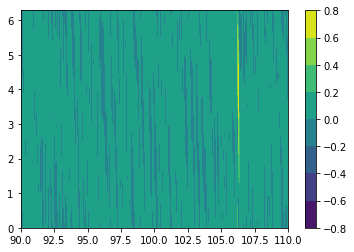

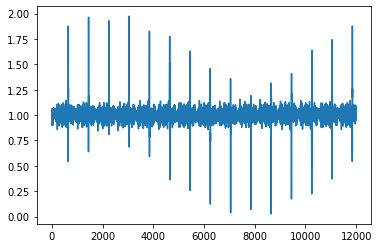

[0.025809947608515738, 0    106.24500
1      4.48799
2      0.66159
Name: 8649, dtype: float64]
['106.455', '4', '0.738866']


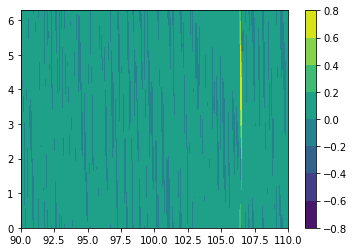

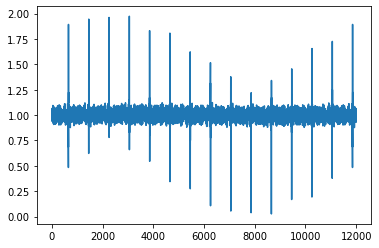

[0.02696429393151134, 0    106.446000
1      4.487990
2      0.718943
Name: 8657, dtype: float64]
['106.652', '4', '0.758192']


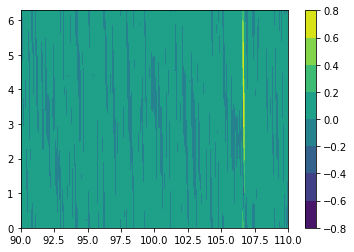

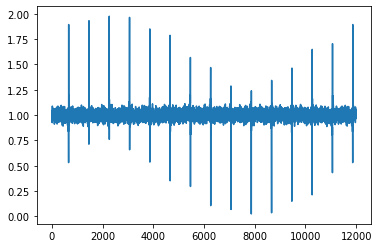

[0.023168273999198075, 0    106.646000
1      4.039190
2      0.740626
Name: 7865, dtype: float64]
['106.848', '4', '0.690713']


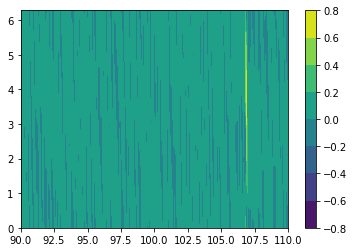

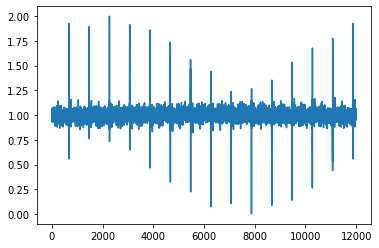

[0.0031938011880477957, 0    106.846000
1      4.039190
2      0.688507
Name: 7873, dtype: float64]
['107.045', '4', '0.690537']


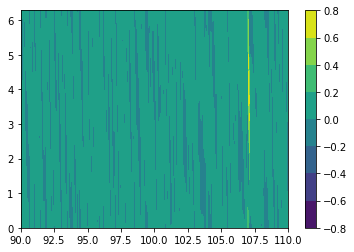

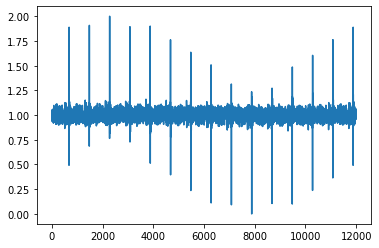

[-0.0010629408706557264, 0    107.046000
1      4.039190
2      0.691271
Name: 7881, dtype: float64]
['107.242', '4', '0.687796']


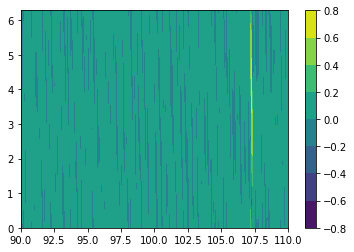

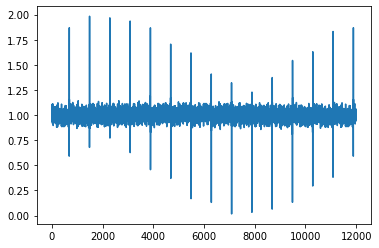

[0.015891339874032462, 0    107.247000
1      3.590390
2      0.676866
Name: 7089, dtype: float64]
['107.439', '4', '0.703461']


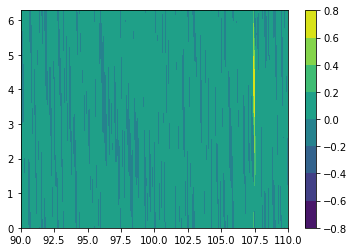

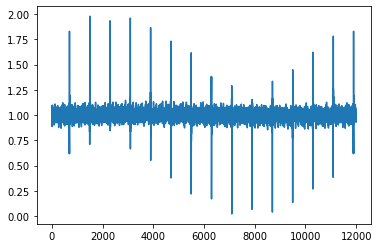

[0.020883886953221298, 0    107.44700
1      3.59039
2      0.68877
Name: 7097, dtype: float64]
['107.636', '4', '0.646991']


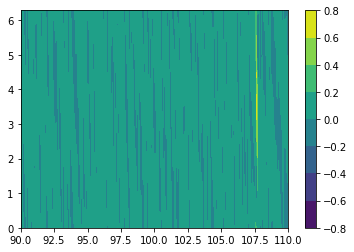

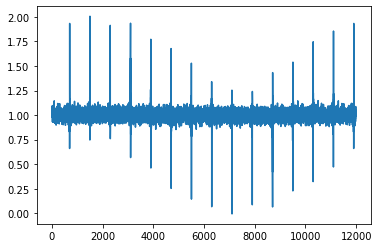

[-0.006405035000486947, 0    107.647000
1      3.590390
2      0.651135
Name: 7105, dtype: float64]
['107.833', '4', '0.701306']


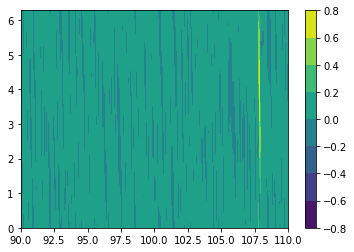

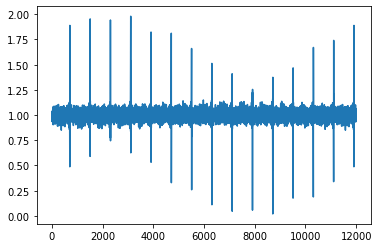

[0.019517870943639437, 0    107.822000
1      4.487990
2      0.687618
Name: 8712, dtype: float64]
['108.03', '4', '0.653376']


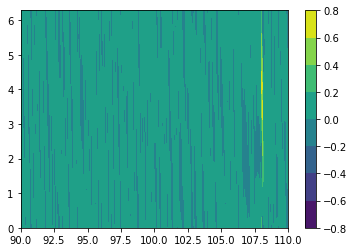

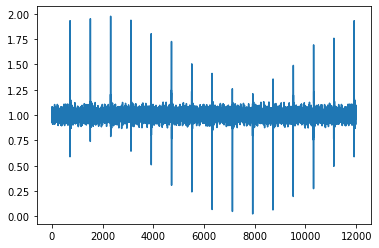

[0.023651006464883828, 0    108.023000
1      4.039190
2      0.637923
Name: 7920, dtype: float64]
['108.227', '4', '0.649071']


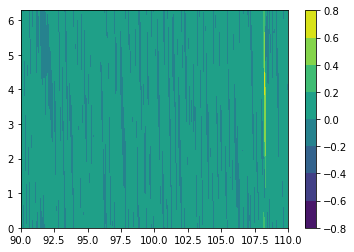

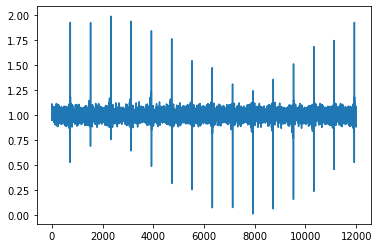

[0.01278288507728742, 0    108.223000
1      4.039190
2      0.640774
Name: 7928, dtype: float64]
['108.424', '4', '0.701938']


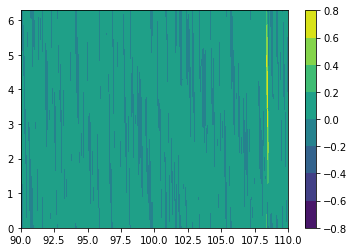

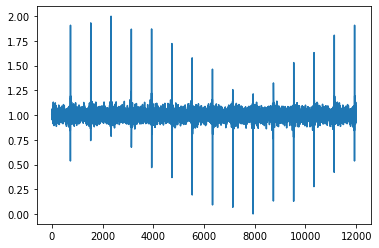

[0.00043878519185447384, 0    108.42300
1      4.03919
2      0.70163
Name: 7936, dtype: float64]
['108.621', '4', '0.701422']


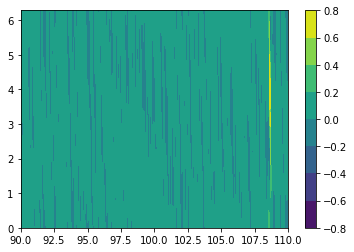

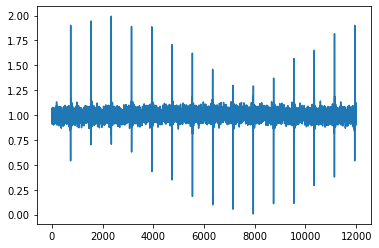

[0.006469714380216263, 0    108.623000
1      4.039190
2      0.696884
Name: 7944, dtype: float64]
['108.818', '4', '0.710093']


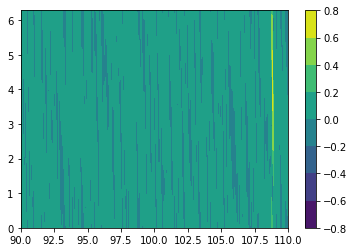

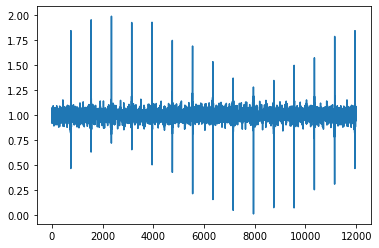

[0.01485580057823399, 0    108.824000
1      4.039190
2      0.699544
Name: 7952, dtype: float64]
['109.015', '4', '0.691506']


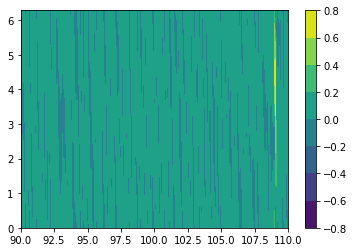

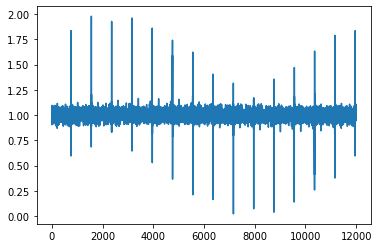

[0.020740239419469897, 0    109.024000
1      3.590390
2      0.677164
Name: 7160, dtype: float64]
['109.212', '4', '0.696884']


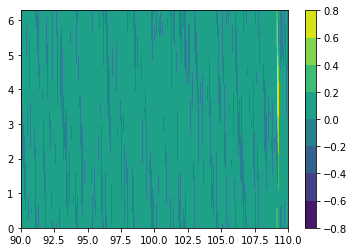

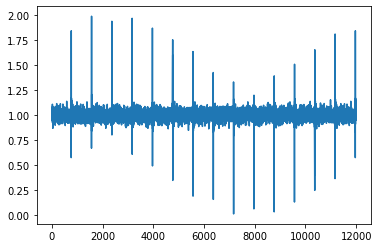

[0.015484643068286785, 0    109.224000
1      3.590390
2      0.686093
Name: 7168, dtype: float64]
['109.409', '4', '0.699355']


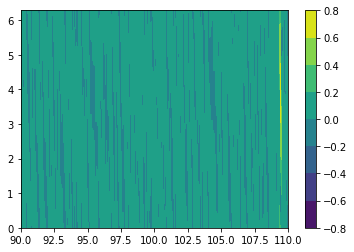

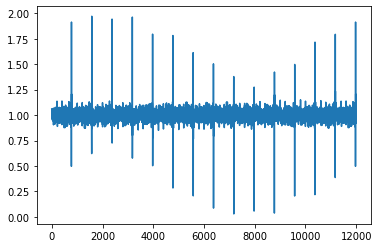

[0.028326100478297866, 0    109.424000
1      3.590390
2      0.679545
Name: 7176, dtype: float64]
['109.606', '4', '0.703558']


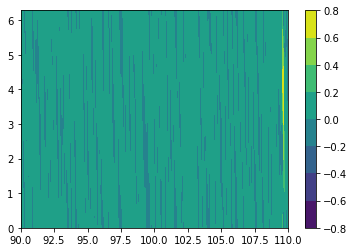

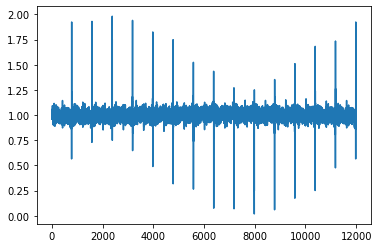

[0.01812359464322777, 0    109.600000
1      4.039190
2      0.690807
Name: 7983, dtype: float64]
['109.803', '4', '0.693264']


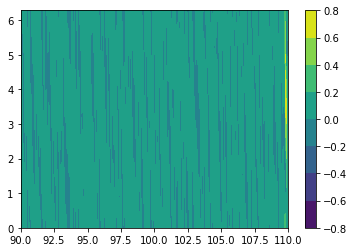

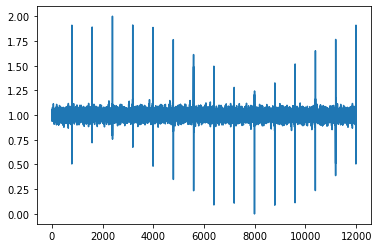

[-0.00026973851231293366, 0    109.800000
1      4.039190
2      0.693451
Name: 7991, dtype: float64]
['110', '4', '0.728875']


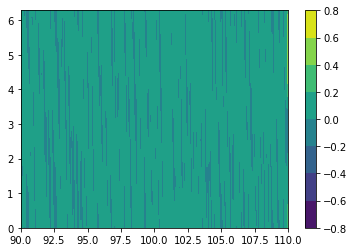

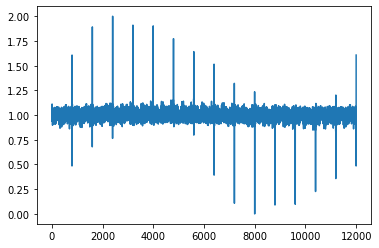

[-0.0015805179214543053, 0    110.000000
1      4.039190
2      0.730027
Name: 7999, dtype: float64]


In [12]:
for f in freqList:
    plotmismatch(e1.getFileName(10000,4,1.4,f,0.001,4),"tbsmall",f,4,1)

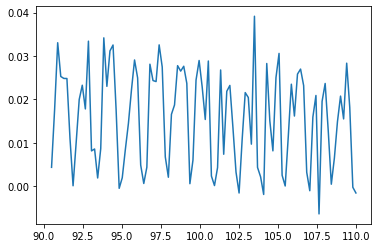

In [13]:
mmlist = [mismatch(e1.getFileName(10000,4,1.4,f,0.001,4),"tbsmall",f,4,1).min() for f in freqList]
plt.plot(freqList,mmlist)

(array([19., 21., 20., 32.,  8.]),
 array([-0.00640504,  0.00270402,  0.01181307,  0.02092212,  0.03003117,
         0.03914022]),
 <BarContainer object of 5 artists>)

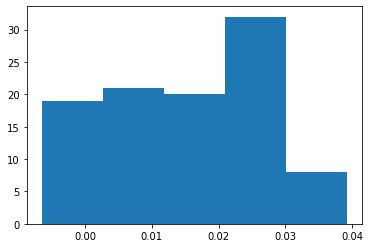

In [14]:
plt.hist(mmlist,bins=5)

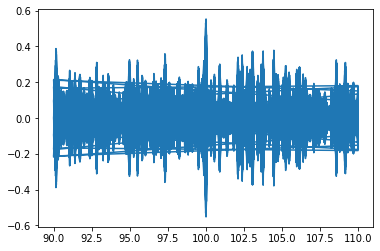

In [30]:
plt.plot(df[0],df[2])

In [31]:
df

,0,1,2
0,90.0000,0.00000,-0.215480
1,90.0250,0.00000,-0.096734
2,90.0501,0.00000,0.081894
3,90.0751,0.00000,0.052566
4,90.1001,0.00000,-0.171582
...,...,...,...
11995,109.9000,6.28319,-0.031061
11996,109.9250,6.28319,-0.037221
11997,109.9500,6.28319,-0.074958
11998,109.9750,6.28319,-0.089770


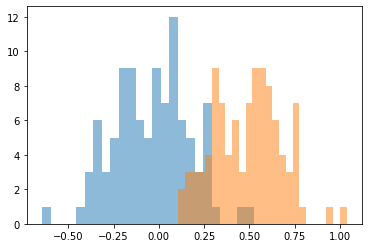

In [83]:
# Probe noise and plot probability diagram
s=40
a=1.4
f=97
e1.generate_source100(10000,s,0)
probeN=[float(e1.method_one(e1.getFileName(10000,s,0)+"_"+str(i),f,4)[2])/a for i in range(0,100)]
plt.hist(probeN,bins=25,alpha=0.5)
e1.generate_source100(10000,s,a,f,0.001,4)
probeS=[float(e1.method_one(e1.getFileName(10000,s,a,f,0.001,4)+"_"+str(i),97,4)[2])/a for i in range(0,100)]
plt.hist(probeS,bins=25,alpha=0.5)
plt.show()

In [84]:
probeN

[0.10889357142857144,
 0.26514857142857146,
 0.08029285714285715,
 0.06464892857142858,
 -0.15732357142857145,
 -0.19274928571428573,
 0.18113785714285716,
 -0.08960071428571428,
 -0.14638428571428572,
 -0.31875071428571433,
 -0.1758257142857143,
 -0.3972164285714286,
 -0.3344164285714286,
 0.17169928571428572,
 -0.0651515,
 -0.04059271428571429,
 0.12262285714285714,
 -0.010182785714285715,
 0.173215,
 0.2520164285714286,
 -0.36986142857142856,
 -0.05059857142857143,
 -0.23614857142857146,
 0.2818971428571429,
 0.08927214285714286,
 -0.01970007142857143,
 -0.22373928571428572,
 0.12211428571428572,
 -0.38540071428571426,
 -0.28067428571428577,
 -0.13337000000000002,
 0.08570000000000001,
 -0.18494785714285716,
 -0.005045050000000001,
 0.08847428571428573,
 0.2604307142857143,
 -0.1926914285714286,
 0.24545714285714287,
 -0.2069464285714286,
 0.18182428571428572,
 0.057704142857142864,
 -0.13998000000000002,
 0.14710857142857142,
 0.26304928571428576,
 -0.27186785714285716,
 0.02754242

In [85]:
thresholds=np.linspace(0,1,1000)

FP=[len([i for i in probeN if i>threshold]) for threshold in thresholds]
TP=[len([i for i in probeS if i>threshold]) for threshold in thresholds]

[46, 46, 45, 45, 45, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 38, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 33, 33, 32, 31, 31, 31, 31, 30, 30, 30, 29, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 25, 25, 25, 25, 25, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 10, 9, 9, 9, 9,

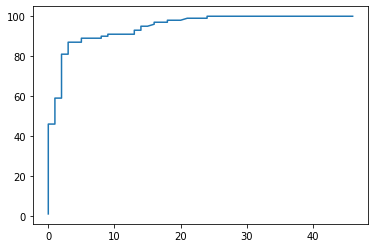

In [86]:
plt.plot(FP,TP)

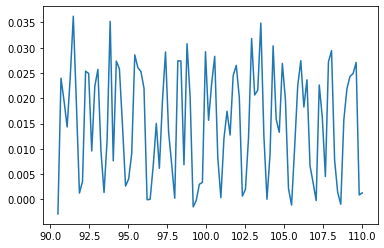

In [10]:
mmlist = [mismatch(e1.getFileName(10000,4,1.4,f,0.001,4),"tbsmall",f,4,1).min() for f in freqList]
plt.plot(freqList,mmlist)
plt.show()
plt.hist(mmlist,bins=5)
plt.show()

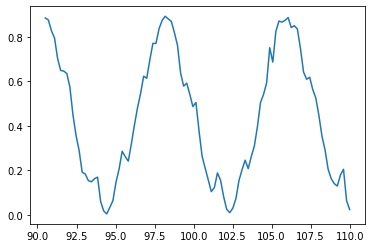

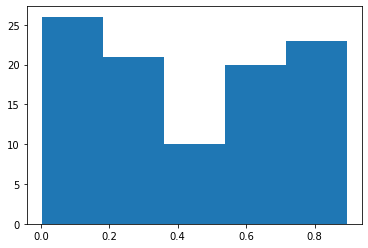

In [12]:
mmlist = [mismatch(e1.getFileName(10000,4,1.4,f,0.001,4),"tbtiny",f,4,1).min() for f in freqList]
plt.plot(freqList,mmlist)
plt.show()
plt.hist(mmlist,bins=5)
plt.show()

***ROC Curve for same signal but different N***

In [17]:
# Probe noise and plot probability diagram
def roc_curve(sigma, amplitude, frequency,N=10000):
    # histogram 
    e1.generate_source100(N,sigma,0)
    probeN=[float(e1.method_one(e1.getFileName(N,sigma,0)+"_"+str(i),f,4)[2])/amplitude for i in range(0,100)]
    plt.hist(probeN,bins=25,alpha=0.5)
    e1.generate_source100(N,sigma,amplitude,frequency,0.001,4)
    probeS=[float(e1.method_one(e1.getFileName(N,sigma,amplitude,frequency,0.001,4)+"_"+str(i),97,4)[2])/amplitude for i in range(0,100)]
    plt.hist(probeS,bins=25,alpha=0.5)
    plt.show()

    # ROC curve
    thresholds=np.linspace(0,1,1000)

    FP=[len([i for i in probeN if i>threshold]) for threshold in thresholds]
    TP=[len([i for i in probeS if i>threshold]) for threshold in thresholds]
    print("Threshold:" + str())
    plt.plot(FP,TP)
    plt.show()

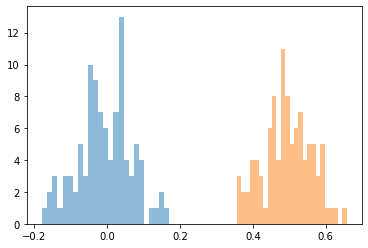

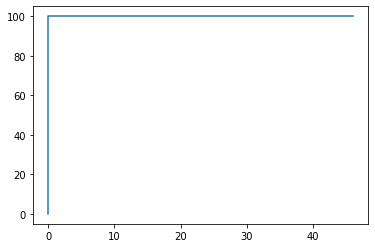

In [21]:
roc_curve(sigma=40,amplitude=1.4,frequency=97,N=100000)

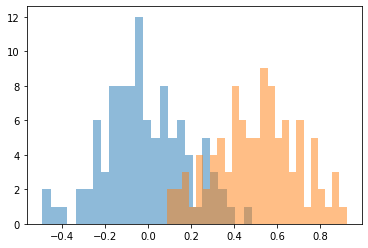

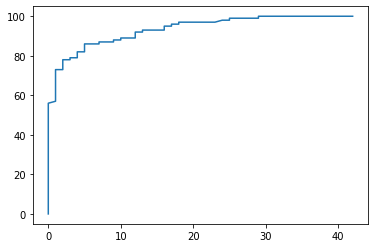

In [18]:
roc_curve(sigma=40,amplitude=1.4,frequency=97,N=10000)

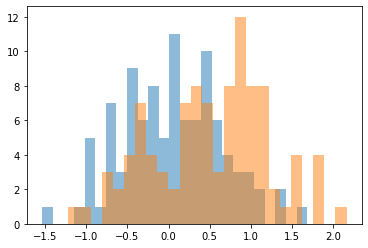

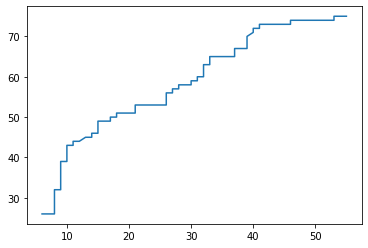

In [19]:
roc_curve(sigma=40,amplitude=1.4,frequency=97,N=1000)

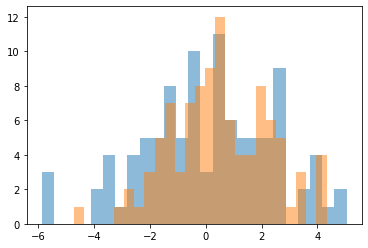

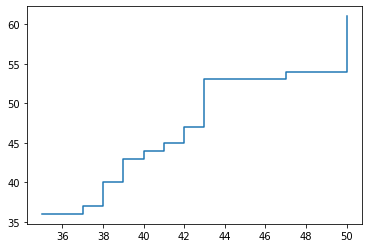

In [20]:
roc_curve(sigma=40,amplitude=1.4,frequency=97,N=100)